In [1]:
import numpy as np
import pytesseract
from PIL import Image
import cv2
from matplotlib import pyplot as plt

# Importing the one of the image files (PNG in this case due to the lossless compression algorithm - we should read directly into Python from PDF though)

#image = cv2.imread('../msk_RF1-0.png',cv2.IMREAD_GRAYSCALE)
image = cv2.imread('../msk_RF1-0.png')

#from pyimagesearch.transform import four_point_transform
from skimage.filters import threshold_local
import numpy as np
import argparse
import imutils

In [ ]:
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)
 
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
 
# show the original image and the edge detected image
print("STEP 1: Edge Detection")
cv2.imshow("Image", image)
cv2.imshow("Edged", edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

STEP 1: Edge Detection


In [ ]:
from multiprocessing import Pool
from functools import partial
from Tools.JustTrain import JustTrain
from contextlib import closing


In [ ]:
# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
    
def Operate(cnts,j):
    c=cnts[j]
    peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    return approx

func = partial(Operate, k_class = k_classifiers , training = training_data,testing = testing_data)
with closing( Pool(processes = k, maxtasksperchild=1)) as p:
        cl_map = p.map(func, range(k))

        
    p.close()
    p.join()

In [ ]:
# loop over the contours
contours = []
for c in cl_map:
    # approximate the contour 
	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
        contours+=[approx]

In [ ]:
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
cv2.imshow("Outline", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
gimage = cv2.imread('gray2.png',cv2.IMREAD_GRAYSCALE)


In [27]:
gimage

array([[204, 204, 204, ..., 204, 204, 204],
       [204, 204, 204, ..., 204, 204, 204],
       [204, 204, 204, ..., 204, 204, 204],
       ...,
       [204, 204, 204, ..., 204, 204, 204],
       [204, 204, 204, ..., 204, 204, 204],
       [204, 204, 204, ..., 204, 204, 204]], dtype=uint8)

In [28]:
for line in image:
    for i in range(0,len(line)):
        if line[i] > 60 and line[i] < 65:
            line[i] = 0
        if line[i] > 165 and line[i] < 175:
            line[i] = 255
        if line[i] > 203 and line[i] < 208:
            line[i] = 255

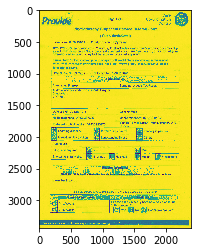

In [31]:
plt.imshow(image)

In [32]:
MyInput = Image.fromarray(image)

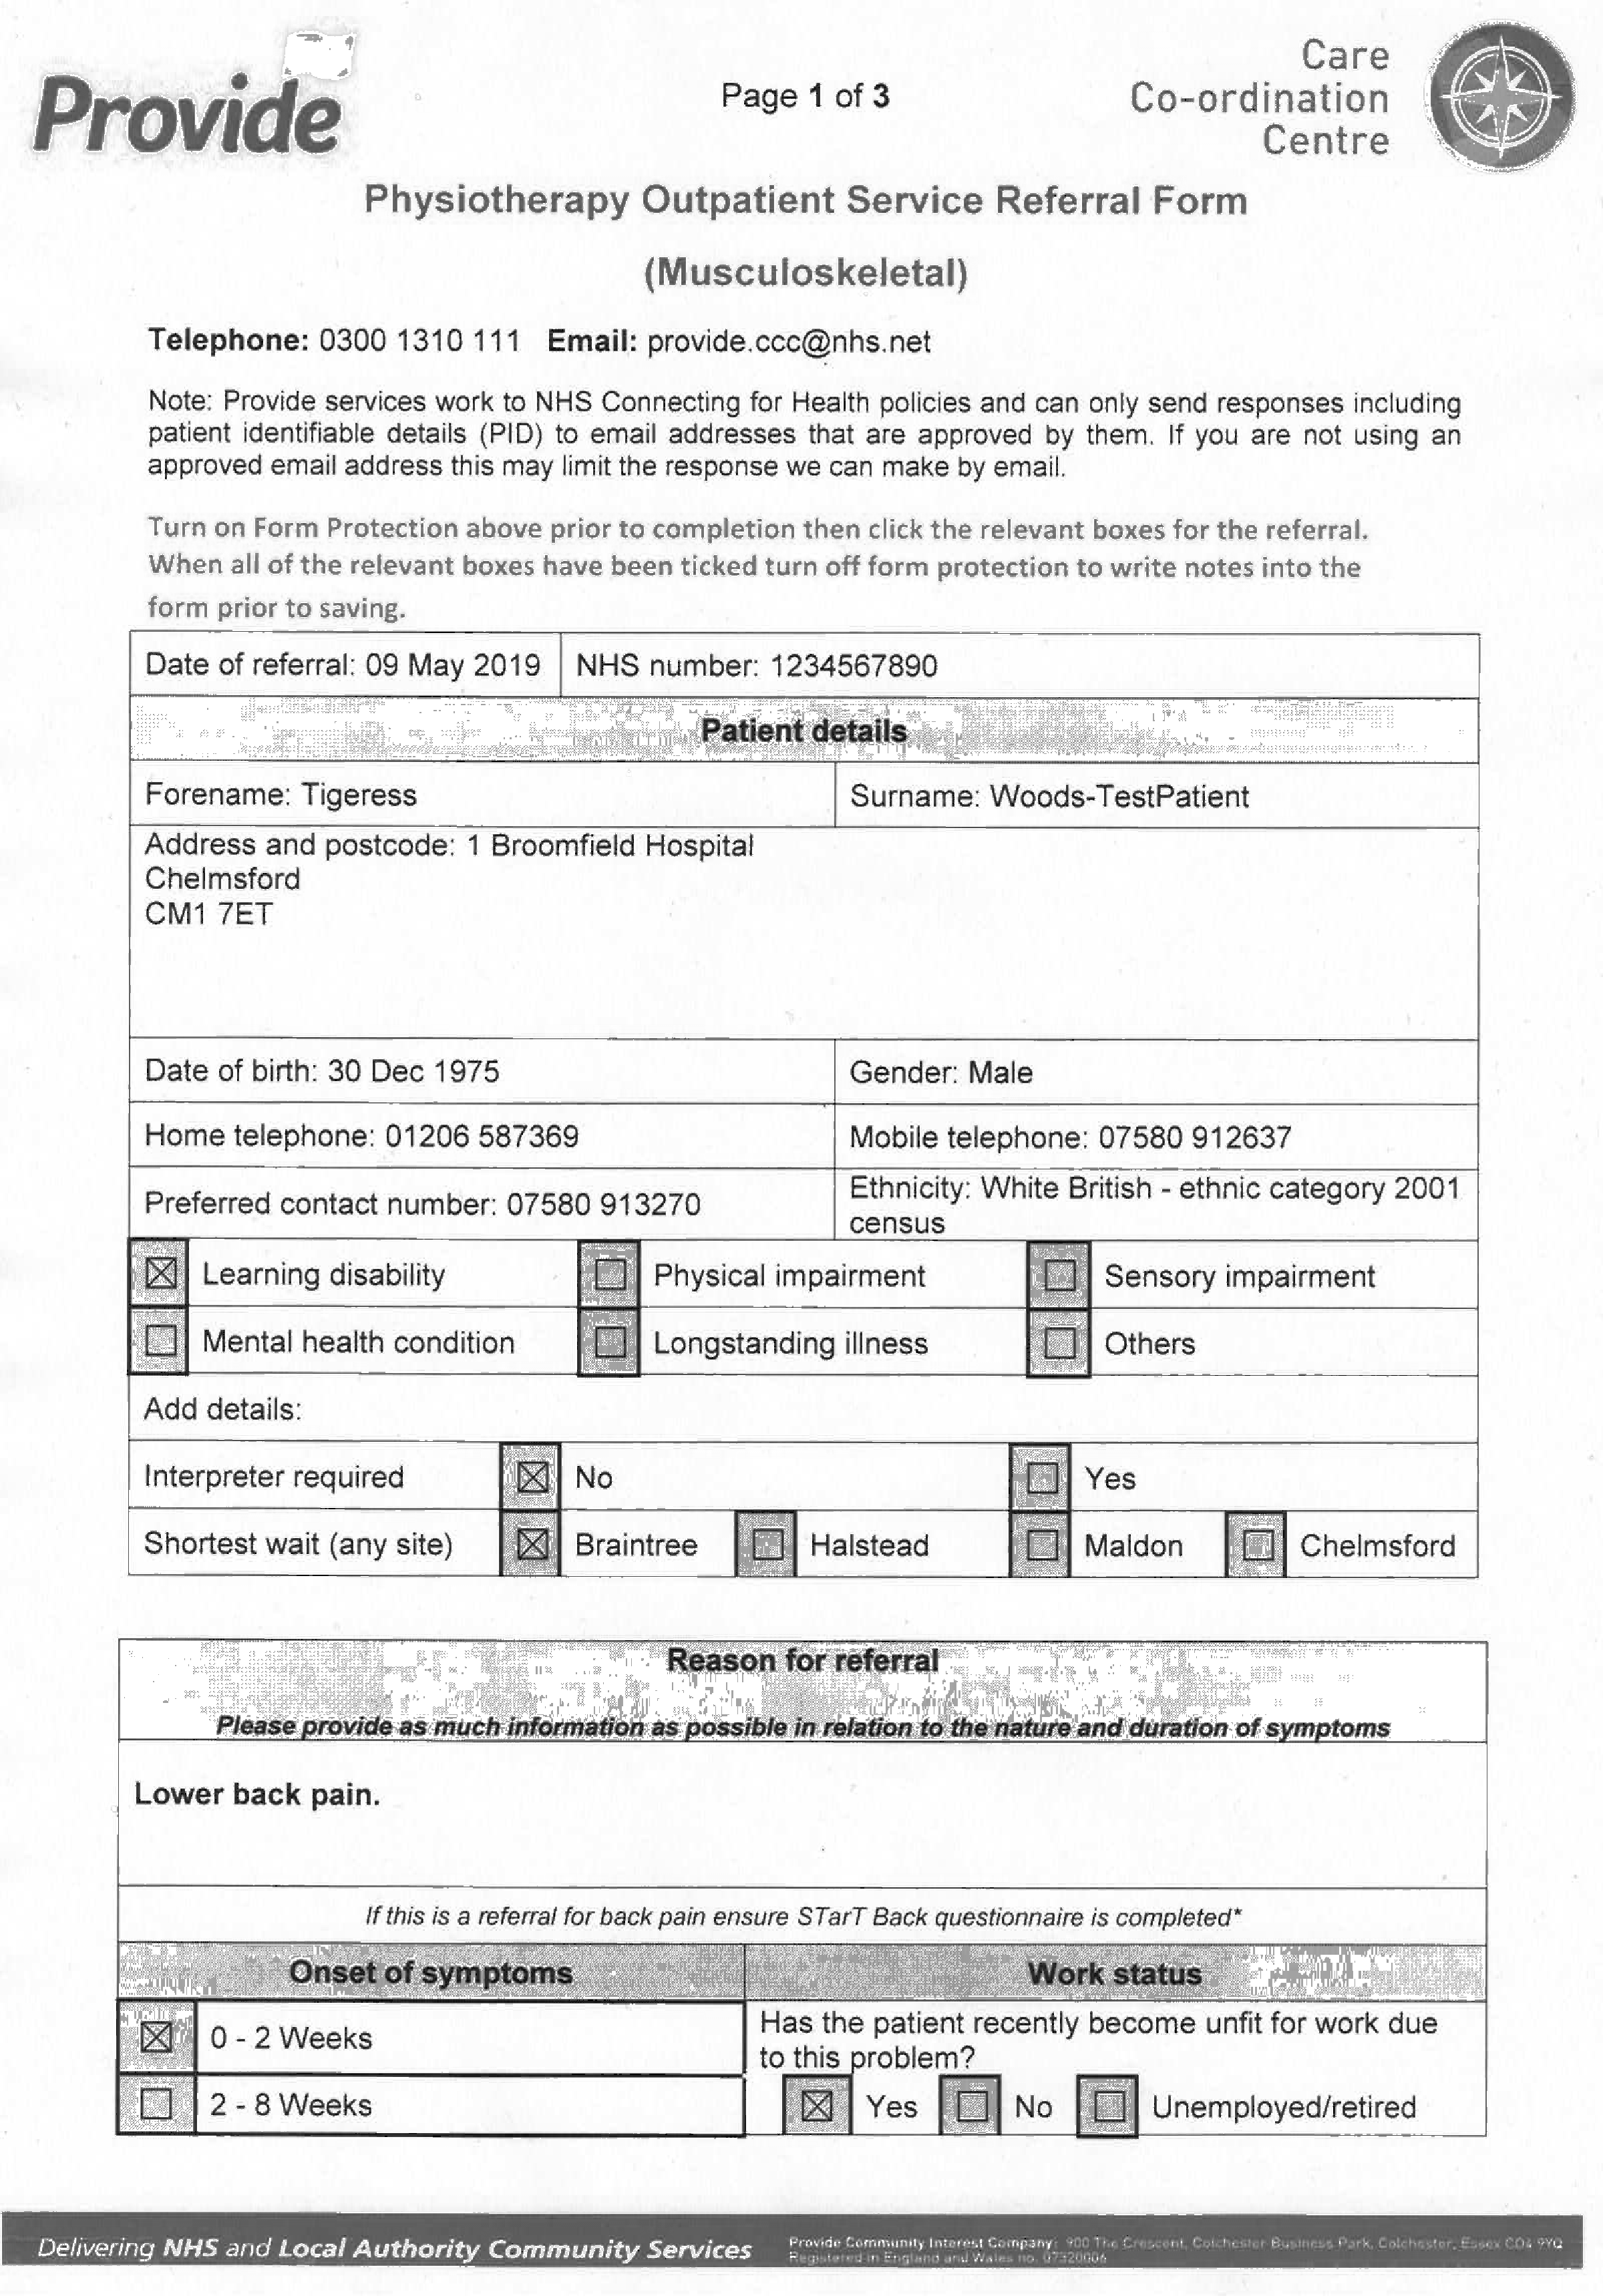

In [33]:
MyInput

In [34]:
cv2.imwrite('filtered.png',image)

True

In [35]:
text = pytesseract.image_to_string('filtered.png')
print(text)

~4 Care
og Page 1 of 3 Co-ordinati
Provide frit ee Gahere

Physiotherapy Outpatient Service Referral Form

 

(Musculoskeletal)

Telephone: 0300 1310 111 Email: provide.cec@nhs.net

Note: Provide services work to NHS Connecting for Health policies and can only send responses including
patient identifiable details (PID) to email addresses that are approved by them. If you are not using an
approved email address this may limit the response we can make by email.

Turn on Form Protection above prior to completion then click the relevant boxes for the referral.
When all of the relevant boxes have been ticked turn off form protection to write notes into the

form prior to saving.

Date of referral: O9 May 2019 | NHS number: 1234567890

Forename: Tigeress
Address and postcode: 1 Broomfield Hospital

Chelmsford
CM1 7ET

ns : 7 Has the patient recently become unfit for work due
eee to this problem?
2 - 8 Weeks

 

Delivering NHS and Local Authority Community Services


In [35]:
text = pytesseract.image_to_string('../msk_RF1-0.png')


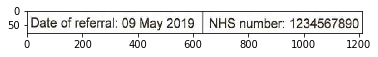

In [3]:
y = 950
h = 80
x = 205
w = 1210
date_nhs = image[y:y+h, x:x+w]
plt.imshow(date_nhs)




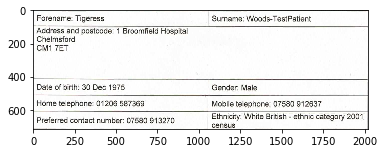

In [11]:
y = 1140
h = 715
x = 195
w = 2020
patient_details = image[y:y+h, x:x+w]

plt.imshow(patient_details)
#plt.savefig("my_patient_details.png")

In [13]:
type(patient_details)

numpy.ndarray

In [23]:
MyInput = Image.fromarray(patient_details).convert('L')

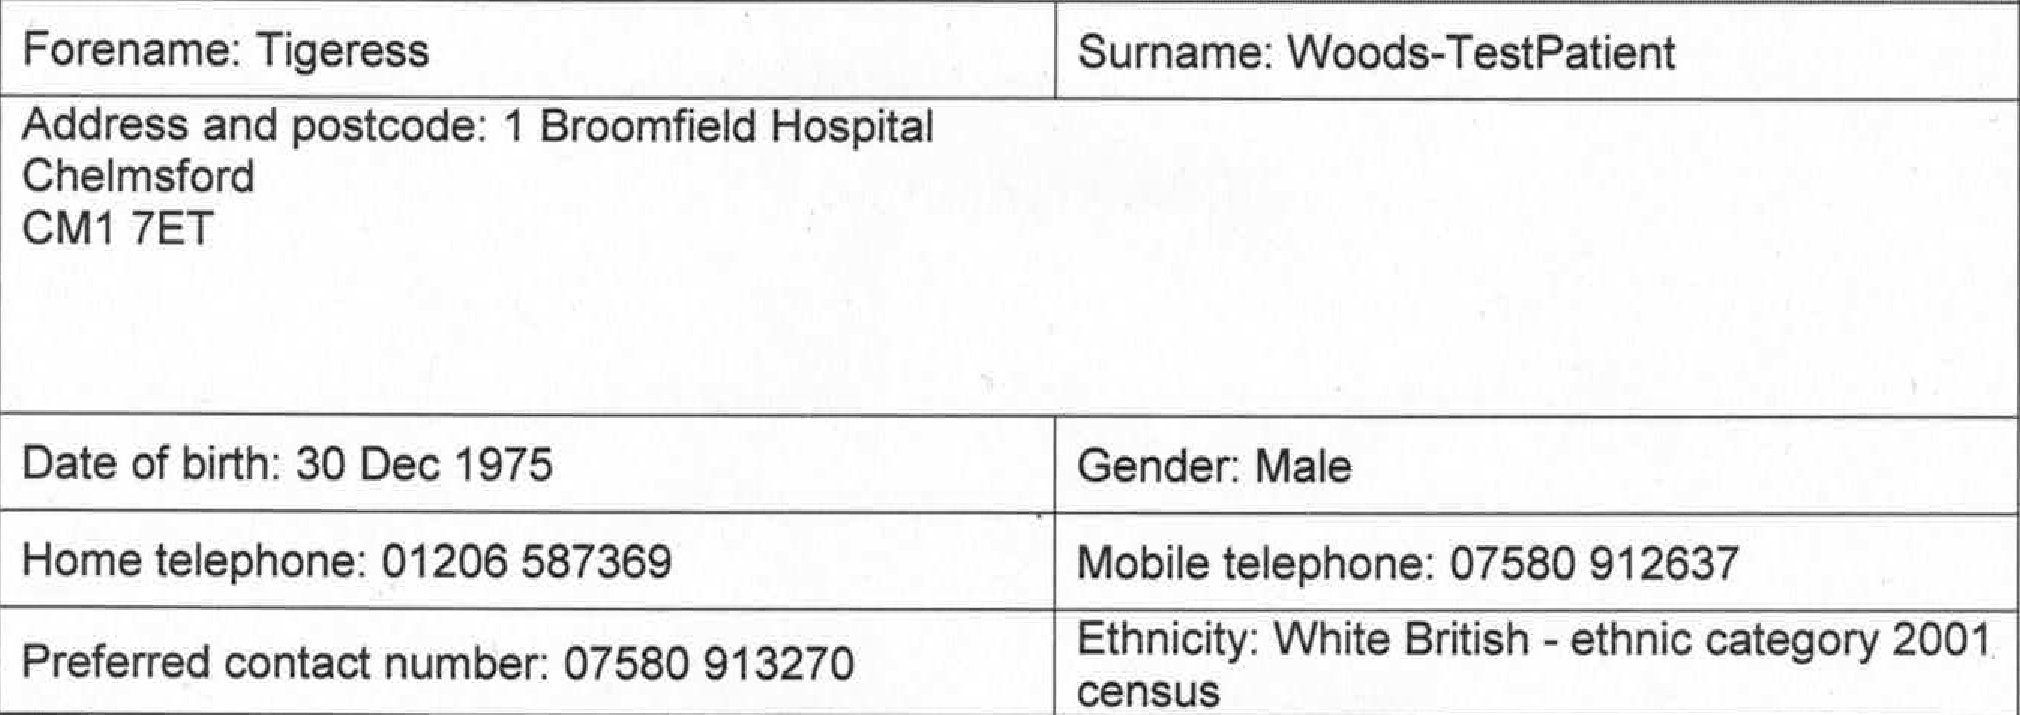

In [24]:
MyInput

In [30]:
cv2.imwrite('patient_details.png',patient_details)

True

In [31]:
# We can already detect the test through a quite nice Python OCR
text = pytesseract.image_to_string('patient_details.png')
print(text)

Forename: Tigeress Surname: Woods-TestPatient

Address and postcode: 1 Broomfield Hospital
Chelmsford
CM1 7ET

Date of birth: 30 Dec 1975 Gender: Male

Home telephone: 01206 587369 Mobile telephone: 07580 912637

Ethnicity: White British - ethnic category 2001
census

   

Preferred contact number: 07580 913270


In [32]:

y = 1130
h = 728
x = 180
w = 2050
patient_details = image[y:y+h, x:x+w]

gray_patient_details = cv2.cvtColor(patient_details, cv2.COLOR_BGR2GRAY) # input image must be grayscale
gray_patient_details = cv2.bilateralFilter(gray_patient_details,9,100,100) # this filter preserves edges and reduces overall noise in the image - better for both the OCR and the line detection

edges = cv2.Canny(gray_patient_details,1,500,apertureSize = 3) # the parameters have to be optimized
lines = cv2.HoughLines(edges,200,np.pi/10, 20) # # the parameters have to be optimized 


In [33]:

# The below for loop runs till r and theta values  
# are in the range of the 2d array 
for r,theta in lines[0]: 
      
    # Stores the value of cos(theta) in a 
    a = np.cos(theta) 
  
    # Stores the value of sin(theta) in b 
    b = np.sin(theta) 
      
    # x0 stores the value rcos(theta) 
    x0 = a*r 
      
    # y0 stores the value rsin(theta) 
    y0 = b*r 
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be  
    #drawn. In this case, it is red.  
    cv2.line(gray_patient_details,(x1,y1), (x2,y2), (0,0,255),5) 

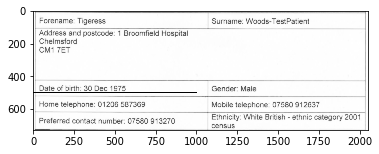

In [34]:

      
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 
cv2.imwrite('linesDetected.jpg', gray_patient_details) # I think that there is an issue with plotting here. We should make sure that we fix this in order to be able to 

plt.imshow(gray_patient_details, cmap='Greys_r')